✅ Dataset loaded successfully.
✅ Columns filtered: 14 categorical, 3 numeric.
📁 AutoViz will attempt to save plots in: /home/2734986_tcs/VS_code/data_analytics_agents/insights_gen/fin/charts
Shape of your Data Set loaded: (9994, 17)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  13
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  1
    17 Predictors cla

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Order Date,category,0.000000,12,,,1237 rare categories: Too many to list. Group them into a single category or drop the categories.
Ship Date,category,0.000000,13,,,1334 rare categories: Too many to list. Group them into a single category or drop the categories.
Ship Mode,category,0.000000,0,,,No issue
Customer ID,category,0.000000,7,,,793 rare categories: Too many to list. Group them into a single category or drop the categories.
Customer Name,category,0.000000,7,,,793 rare categories: Too many to list. Group them into a single category or drop the categories.
Segment,category,0.000000,0,,,No issue
Country,category,0.000000,0,,,Possible Zero-variance or low information colum: drop before modeling step.
City,category,0.000000,5,,,518 rare categories: Too many to list. Group them into a single category or drop the categories.
State,category,0.000000,0,,,27 rare categories: Too many to list. Group them into a single category or drop the categories.
Region,category,0.000000,0,,,No issue


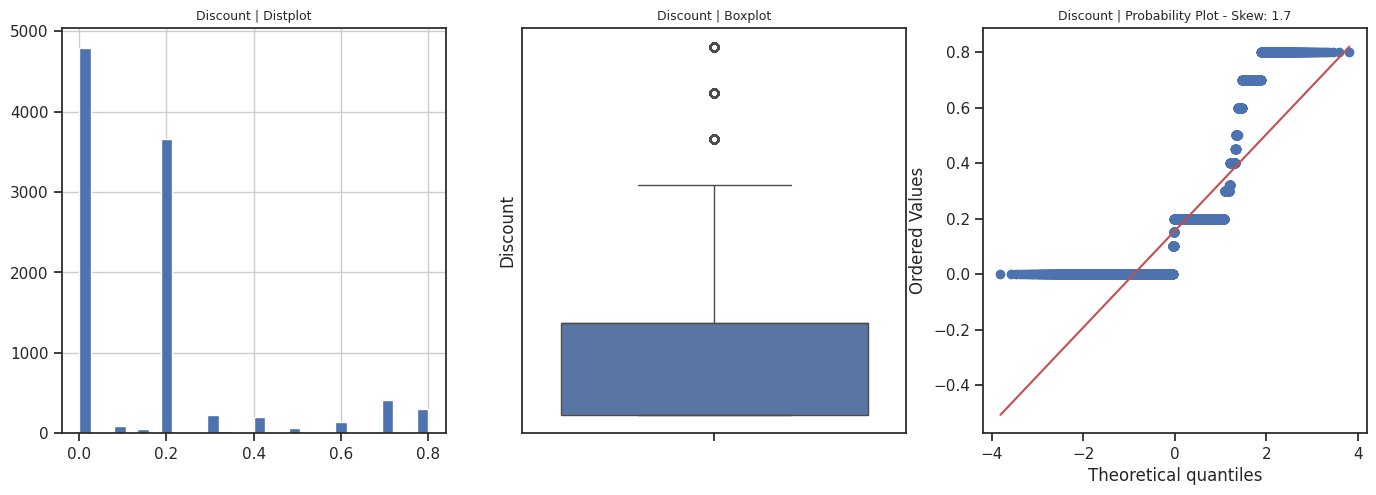

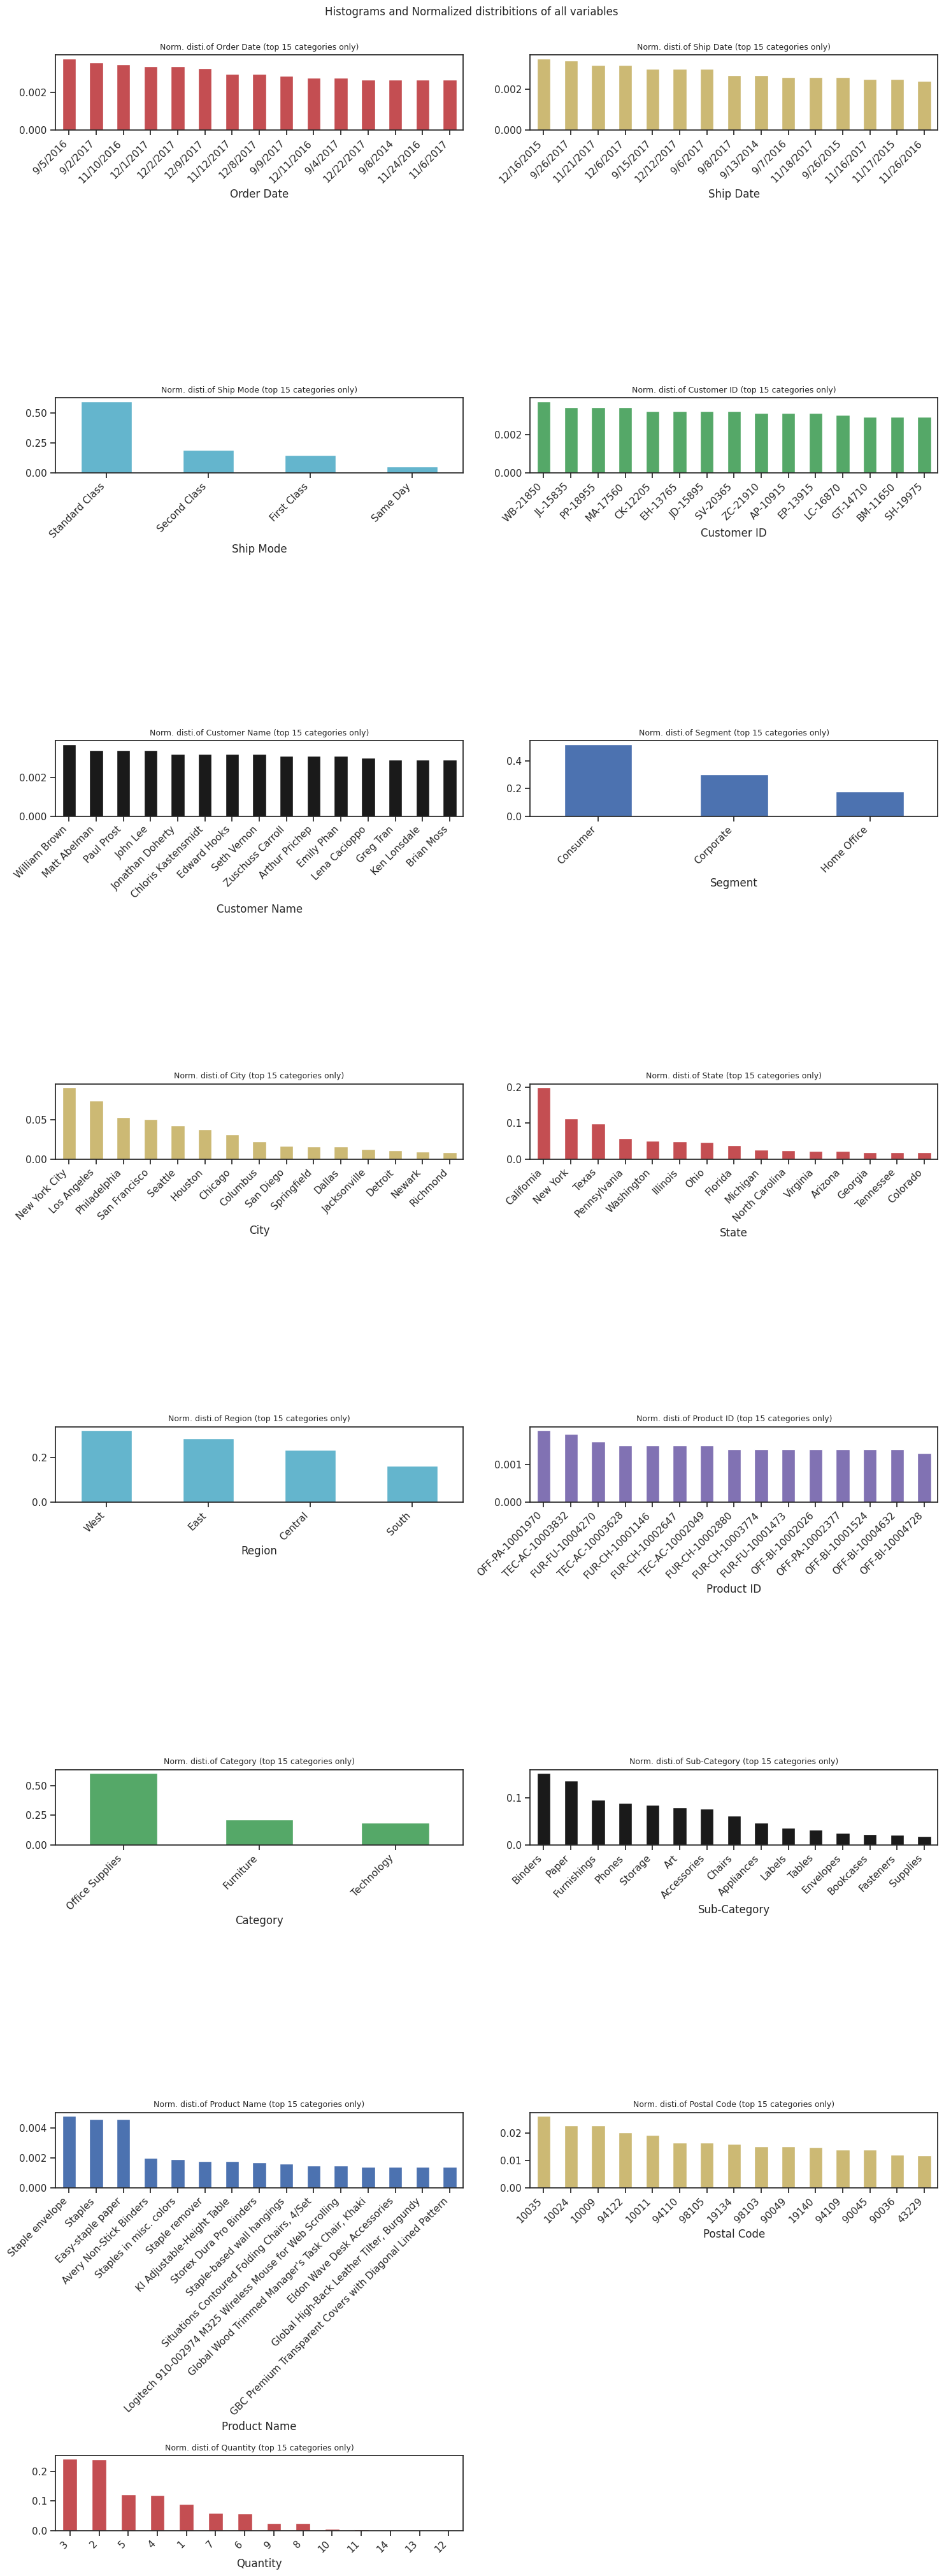

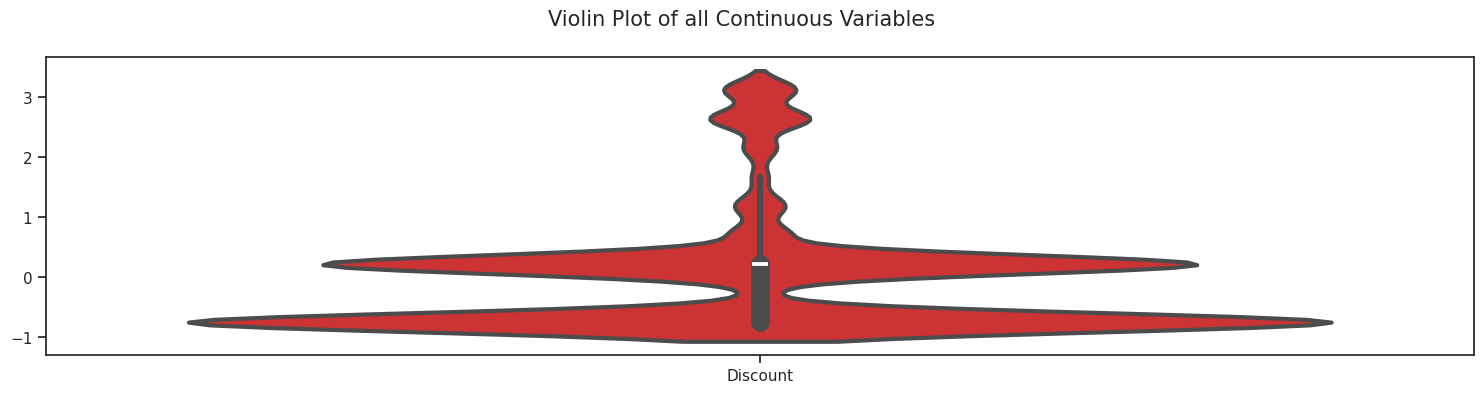

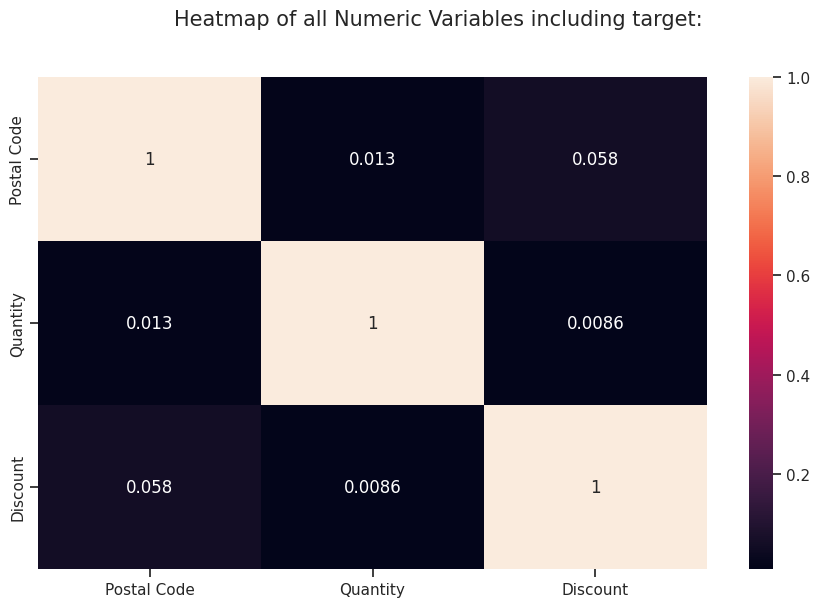

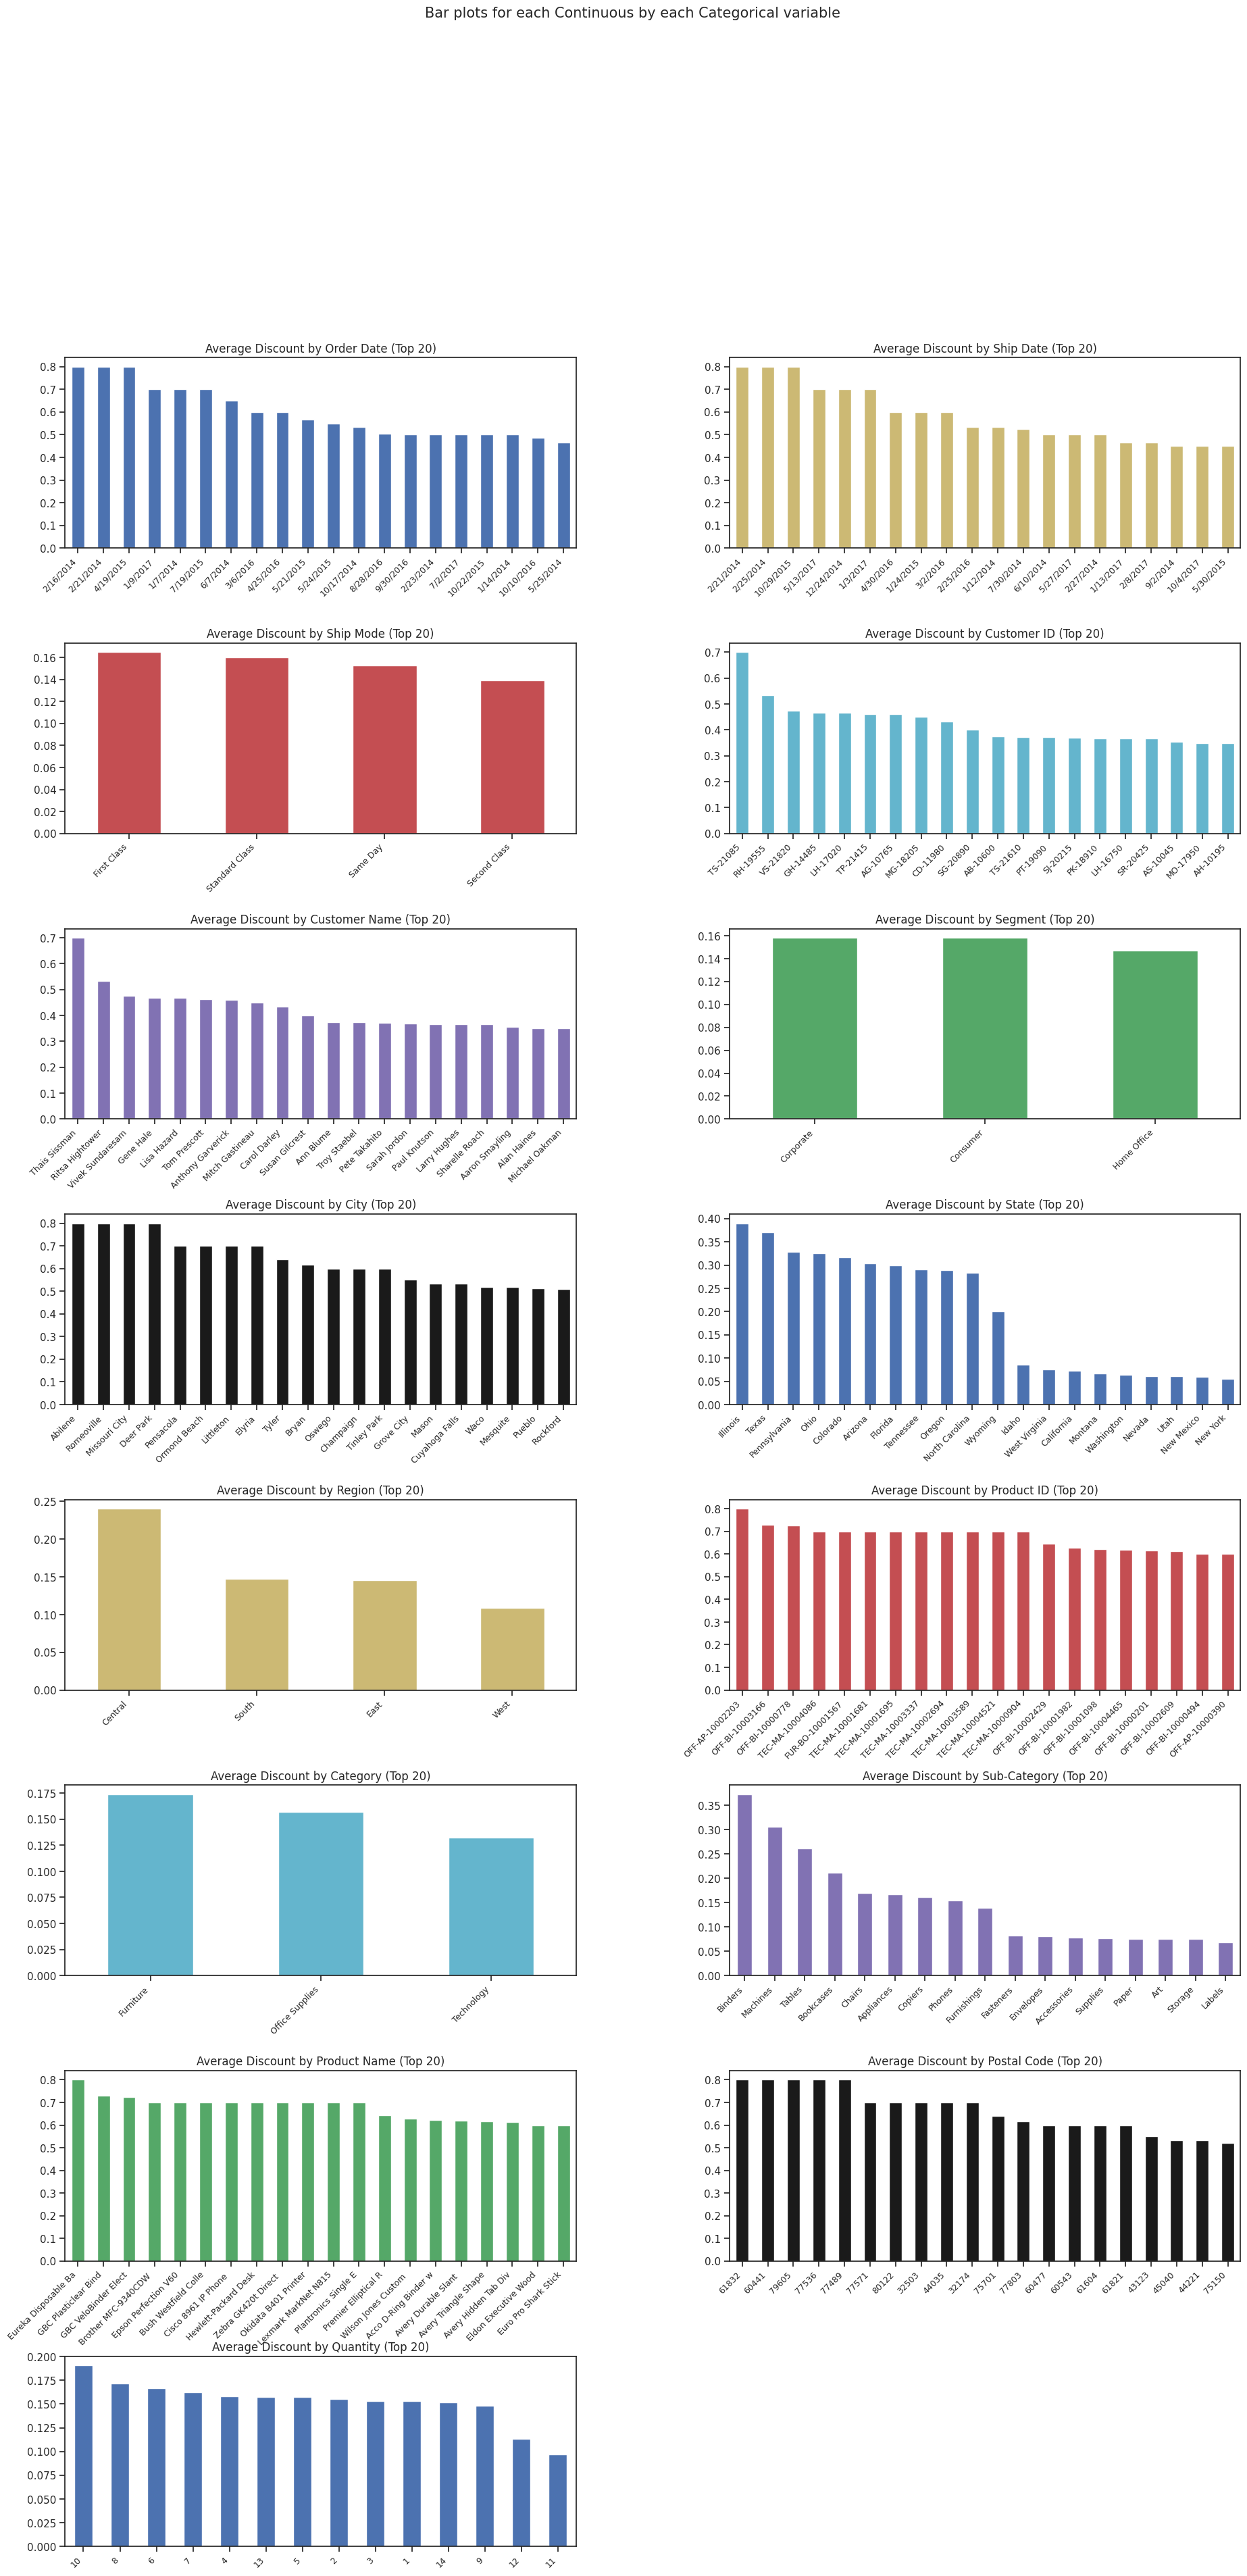

All Plots done
Time to run AutoViz = 4 seconds 

 ###################### AUTO VISUALIZATION Completed ########################
✅ AutoViz finished running.

🔍 Scanning for generated AutoViz PNGs...
⚠️ No AutoViz PNGs found anywhere under current directory.
✅ Target charts directory created/exists: charts

---------------------------------------------------------
✅ Visualization generation complete (No HTML or Pairplot generated).
✅ Total charts copied to 'charts': 0
---------------------------------------------------------


In [6]:
from autoviz.AutoViz_Class import AutoViz_Class
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import shutil


class AutovizChartGenerator:
    """
    Generate and selectively copy AutoViz charts to a target directory.
    Mirrors the original script logic exactly, with added tracing of save paths.
    """

    def __init__(self, data_path: str, charts_dir: str, duplicate_thresh: float = 0.5):
        self.data_path = data_path
        self.charts_dir = charts_dir
        self.duplicate_thresh = duplicate_thresh
        # self.reports_dir = reports_dir  # (commented out intentionally)
        # self.plots_dir = os.path.join(self.reports_dir, "plots")

    # ---------------------------
    # 1. Load dataset
    # ---------------------------
    def load_dataset(self) -> pd.DataFrame:
        try:
            df = pd.read_csv(self.data_path, encoding="ISO-8859-1")
            print("✅ Dataset loaded successfully.")
            return df
        except FileNotFoundError:
            print(f" Error: Superstore.csv not found at {self.data_path}.")
            raise

    # ---------------------------
    # 2. Filter columns by duplicates
    # ---------------------------
    def filter_by_duplicates(self, df: pd.DataFrame):
        """
        Filters columns where the ratio of duplicates to total rows 
        is greater than the specified threshold.
        """
        n_rows = len(df)
        cats, nums = [], []
        for col in df.columns:
            num_duplicates = n_rows - df[col].nunique(dropna=True)
            ratio = num_duplicates / n_rows

            if ratio > self.duplicate_thresh:
                if pd.api.types.is_numeric_dtype(df[col]):
                    nums.append(col)
                else:
                    cats.append(col)
        return cats, nums

    # ---------------------------
    # 3. Run AutoViz and save plots
    # ---------------------------
    def run_autoviz(self, df_filtered: pd.DataFrame):
        AV = AutoViz_Class()

        # Make sure save directory exists
        os.makedirs(self.charts_dir, exist_ok=True)
        abs_save_path = os.path.abspath(self.charts_dir)
        print(f"📁 AutoViz will attempt to save plots in: {abs_save_path}")

        dfte = AV.AutoViz(
            filename="",
            dfte=df_filtered,
            depVar="",
            chart_format="png",
            verbose=1,  # Set to 1 to see full AutoViz output
            max_rows_analyzed=len(df_filtered),
            max_cols_analyzed=len(df_filtered.columns),
            save_plot_dir=abs_save_path
        )
        print("✅ AutoViz finished running.")

        plt.close("all")

        # Scan all likely save paths and show where PNGs exist
        print("\n🔍 Scanning for generated AutoViz PNGs...")
        png_paths = []
        for root, _, files in os.walk("."):
            for f in files:
                if f.lower().endswith(".png") and "autoviz" in root.lower():
                    full_path = os.path.abspath(os.path.join(root, f))
                    png_paths.append(full_path)

        if png_paths:
            print(f"✅ Found {len(png_paths)} AutoViz charts:")
            for p in png_paths[:10]:  # print first 10 only
                print(f"   {p}")
            if len(png_paths) > 10:
                print(f"   ... and {len(png_paths)-10} more.")
        else:
            print("⚠️ No AutoViz PNGs found anywhere under current directory.")

        return dfte

    # ---------------------------
    # 4. Copy AutoViz plots
    # ---------------------------
    def copy_selected_charts(self):
        os.makedirs(self.charts_dir, exist_ok=True)
        print(f"✅ Target charts directory created/exists: {self.charts_dir}")

        # Common AutoViz folder
        possible_dirs = [
            os.path.join(os.getcwd(), "AutoViz"),
            os.path.join(self.charts_dir, "AutoViz"),
        ]

        target_plot_types = ["Bar_Plots", "Dist_Plots_cats", "Dist_plots_numeric", "Scatter_Plots"]
        copied_chart_count = 0

        for d in possible_dirs:
            if not os.path.exists(d):
                continue
            auto_viz_plot_files = glob.glob(os.path.join(d, "*.png"))
            for plot_file in auto_viz_plot_files:
                filename = os.path.basename(plot_file)
                if any(tp.lower() in filename.lower() for tp in target_plot_types):
                    destination_path = os.path.join(self.charts_dir, filename)
                    shutil.copy(plot_file, destination_path)
                    copied_chart_count += 1
                    print(f"   Copied AutoViz chart '{filename}'")

        print("\n---------------------------------------------------------")
        print("✅ Visualization generation complete (No HTML or Pairplot generated).")
        print(f"✅ Total charts copied to '{self.charts_dir}': {copied_chart_count}")
        print("---------------------------------------------------------")

        return copied_chart_count

    # ---------------------------
    # 5. Full run
    # ---------------------------
    def generate_autoviz_charts(self):
        df = self.load_dataset()
        cats, nums = self.filter_by_duplicates(df)

        for col in cats:
            df[col] = df[col].astype("category")

        df_filtered = df[cats + nums]
        print(f"✅ Columns filtered: {len(cats)} categorical, {len(nums)} numeric.")

        self.run_autoviz(df_filtered)
        self.copy_selected_charts()


# ---------------------------
# Example usage
# ---------------------------
if __name__ == "__main__":
    DATA_PATH = r"Superstore.csv"
    CHARTS_DIR = r"charts"

    generator = AutovizChartGenerator(
        data_path=DATA_PATH,
        charts_dir=CHARTS_DIR,
        duplicate_thresh=0.5
    )
    generator.generate_autoviz_charts()
